Lo scopo della features importance, oltre a quello di ridurre la dimensionalità del dataset, è quello di valutare quali features assumono una maggior importanza per il modello, preso in esame, nel prendere una decisione.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle as pkl
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
dataset = pd.read_csv("../csv/train.csv", low_memory=False)

X, y = dataset.loc[:, 'Src Ip' : 'Idle Min'], dataset.loc[:, 'Label']

Nel progetto avendo usato decision tree e random forest mettono già a disposizione la disponibilità di valutare l'importanza delle features utilizzate. Ciò è possibile grazie all'attributo *feature_importances\_* il quale è un vettore che associa a ogni features uno certo score, il quale indica quanto la features risulta cruciale per il modello.

I modelli che andiamo a usare sono modelli che sono stati addestrati in precedenza mantenendo i valori di default per i parametri

Per iniziare andiamo a vedere come è distribuita l'importanza delle features all'interno dei Decision Tree

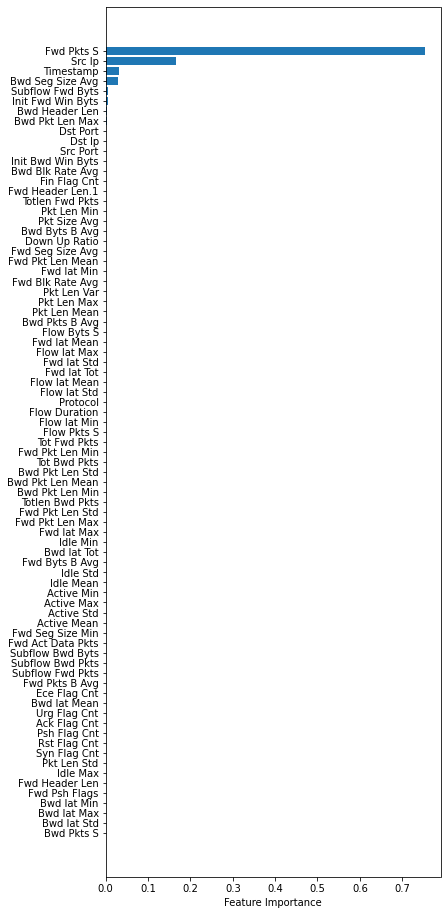

In [6]:
with open("../exported_model/dt_unbalance.pkl", 'rb') as file:
    dt_unbalance = pkl.load(file)

order = dt_unbalance.feature_importances_.argsort()

plt.rcParams["figure.figsize"] = (6, 16)
plt.barh(dataset.columns[order], dt_unbalance.feature_importances_[order])
plt.xlabel("Feature Importance")
plt.show()

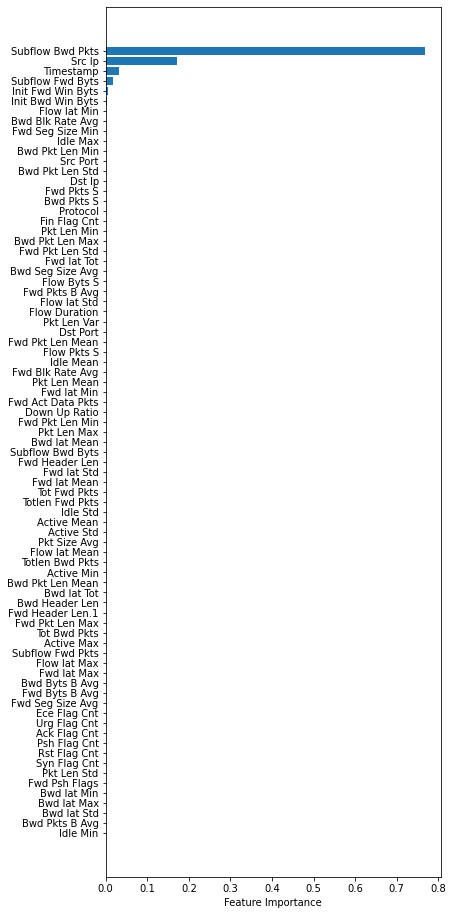

In [7]:
with open("../exported_model/dt_balance.pkl", 'rb') as file:
    dt_balance = pkl.load(file)

order = dt_balance.feature_importances_.argsort()

plt.rcParams["figure.figsize"] = (6, 16)
plt.barh(dataset.columns[order], dt_balance.feature_importances_[order])
plt.xlabel("Feature Importance")
plt.show()

I due modelli appena usati per calcolare l'importanza delle features differiscono per il fatto che uno è stato trovato su un dataset sbilanciata invece l'altro è stato calcolato sullo stesso dataset ma precedentemente bilanciato.
Dai grafici sopra mostrati sembra che ci siano poche features cruciali per la costruzione dei modelli ma ciò è dato dalla natura stocastica del modello nella scelta delle condizioni e per questo motivo le feature prese in esame cambiano da modello a modello.
Per arginare tale problema andiamo a valutare la feature importance come appena fatto ma anziché calcolarla sui Decision Tree prendiamo in considerazione le Random Forest.

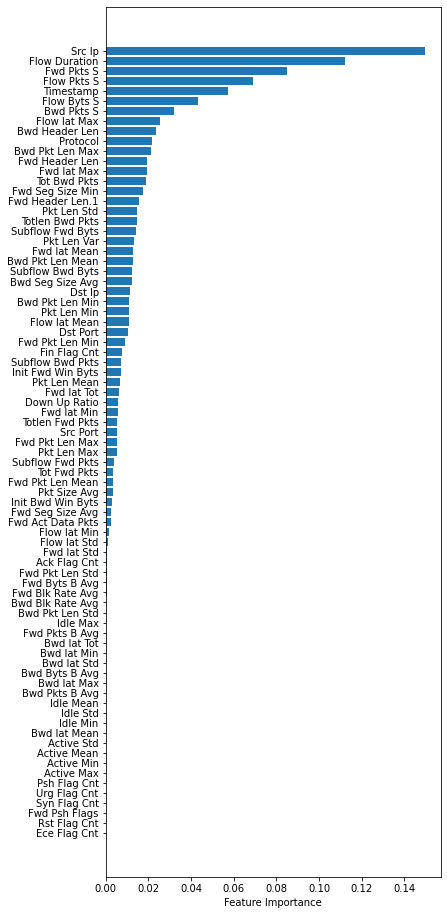

In [8]:
with open("../exported_model/rf_unbalance.pkl", 'rb') as file:
    rf_unbalance = pkl.load(file)

order = rf_unbalance.feature_importances_.argsort()

plt.rcParams["figure.figsize"] = (6, 16)
plt.barh(dataset.columns[order], rf_unbalance.feature_importances_[order])
plt.xlabel("Feature Importance")
plt.show()

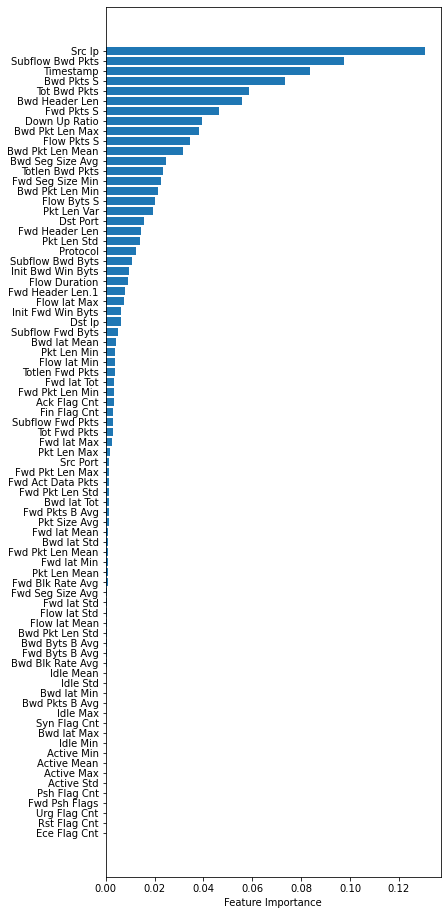

In [9]:
with open("../exported_model/rf_balance.pkl", 'rb') as file:
    rf_balance = pkl.load(file)

order = rf_balance.feature_importances_.argsort()

plt.rcParams["figure.figsize"] = (6, 16)
plt.barh(dataset.columns[order], rf_balance.feature_importances_[order])
plt.xlabel("Feature Importance")
plt.show()

A una prima occhiata i due grafici sembrano avere circa la stessa distribuzione d'importanza per le features, ma le features che vengono ritenute importanti sono le stesse in entrambi i modelli: a primo occhi la cosa che cambia è lo score associato a ciascuna feature e di conseguenza la posizione potrebbe cambiare.
Fatta questa prima analisi qualitativo sono interessato a valutare se le features ritenute importanti, quindi che hanno score maggiore di 0.

In [12]:
#indici score ordinati
order_unbalance = rf_unbalance.feature_importances_.argsort()
order_balance = rf_balance.feature_importances_.argsort()

features_unbalance = dataset.columns[order_unbalance]
features_balance = dataset.columns[order_balance]
importance_unbalance = rf_unbalance.feature_importances_[order_unbalance]
importance_balance = rf_balance.feature_importances_[order_balance]

In [13]:
#prendo solo feature con score superiore a 0
features_unbalance = features_unbalance[np.where(importance_unbalance > 0)]
features_balance = features_balance[np.where(importance_balance > 0)]

print(len(features_unbalance))
print(len(features_balance))

77
77


In [14]:
features_unbalance

Index(['Fwd Psh Flags', 'Syn Flag Cnt', 'Urg Flag Cnt', 'Psh Flag Cnt',
       'Active Max', 'Active Min', 'Active Mean', 'Active Std', 'Bwd Iat Mean',
       'Idle Min', 'Idle Std', 'Idle Mean', 'Bwd Pkts B Avg', 'Bwd Iat Max',
       'Bwd Byts B Avg', 'Bwd Iat Std', 'Bwd Iat Min', 'Bwd Iat Tot',
       'Fwd Pkts B Avg', 'Idle Max', 'Bwd Pkt Len Std', 'Bwd Blk Rate Avg',
       'Fwd Blk Rate Avg', 'Fwd Byts B Avg', 'Fwd Pkt Len Std', 'Ack Flag Cnt',
       'Fwd Iat Std', 'Flow Iat Std', 'Flow Iat Min', 'Fwd Act Data Pkts',
       'Fwd Seg Size Avg', 'Init Bwd Win Byts', 'Pkt Size Avg',
       'Fwd Pkt Len Mean', 'Tot Fwd Pkts', 'Subflow Fwd Pkts', 'Pkt Len Max',
       'Fwd Pkt Len Max', 'Src Port', 'Totlen Fwd Pkts', 'Fwd Iat Min',
       'Down Up Ratio', 'Fwd Iat Tot', 'Pkt Len Mean', 'Init Fwd Win Byts',
       'Subflow Bwd Pkts', 'Fin Flag Cnt', 'Fwd Pkt Len Min', 'Dst Port',
       'Flow Iat Mean', 'Pkt Len Min', 'Bwd Pkt Len Min', 'Dst Ip',
       'Bwd Seg Size Avg', 'Subflow Bw

In [15]:
features_balance

Index(['Urg Flag Cnt', 'Fwd Psh Flags', 'Psh Flag Cnt', 'Active Std',
       'Active Max', 'Active Mean', 'Active Min', 'Idle Min', 'Bwd Iat Max',
       'Syn Flag Cnt', 'Idle Max', 'Bwd Pkts B Avg', 'Bwd Iat Min', 'Idle Std',
       'Idle Mean', 'Bwd Blk Rate Avg', 'Fwd Byts B Avg', 'Bwd Byts B Avg',
       'Bwd Pkt Len Std', 'Flow Iat Mean', 'Flow Iat Std', 'Fwd Iat Std',
       'Fwd Seg Size Avg', 'Fwd Blk Rate Avg', 'Pkt Len Mean', 'Fwd Iat Min',
       'Fwd Pkt Len Mean', 'Bwd Iat Std', 'Fwd Iat Mean', 'Pkt Size Avg',
       'Fwd Pkts B Avg', 'Bwd Iat Tot', 'Fwd Pkt Len Std', 'Fwd Act Data Pkts',
       'Fwd Pkt Len Max', 'Src Port', 'Pkt Len Max', 'Fwd Iat Max',
       'Tot Fwd Pkts', 'Subflow Fwd Pkts', 'Fin Flag Cnt', 'Ack Flag Cnt',
       'Fwd Pkt Len Min', 'Fwd Iat Tot', 'Totlen Fwd Pkts', 'Flow Iat Min',
       'Pkt Len Min', 'Bwd Iat Mean', 'Subflow Fwd Byts', 'Dst Ip',
       'Init Fwd Win Byts', 'Flow Iat Max', 'Fwd Header Len.1',
       'Flow Duration', 'Init Bwd Win By

In [18]:
#confronto i due insiemi d feature e valuto se ci sono differenze, trascurando l'ordine
for feature in features_unbalance:
    if not feature in features_balance:
        print(f"{feature} non presente")

print("Le stesse feature sono ritenute importanti da entrambi i modelli")

Le stesse feature sono ritenute importanti da entrambi i modelli


Da questa breve analisi si conclude che nonostante anche la Random Forest sia un modello di natura stocastica, i due modelli costruiti su dataset sbilanciato e non concordano sulle feature da ritenersi importanti (anche se i valori di score sono differenti); ciò accade perché le Random Forest si basano sul principio della saggezza delle folle dato dal fatto che questo è un classificatore costituito da un numero arbitrario di Decision.

Il passo successivo è quello di riaddestrare i modelli sopracitati utilizzando solo una porzione di feature che corrisponde alla **top 10, 20, 30** delle features ritenute più importanti dal Decision Tree (fecciamo riferimento alla "classifica" calcolata su dataset sbilanciato).

In [24]:
n = len(features_unbalance)

#per prendere in considerazione solo le prime n features, vado a prendere le ultime n features per il fatto che le fetures nel vettore di riferimento sono in ordine crescente
top_10 = features_unbalance[n - 10:]
top_20 = features_unbalance[n - 20:]
top_30 = features_unbalance[n - 30:]

In [26]:
X_top_10 = X.loc[:, top_10]
X_top_20 = X.loc[:, top_20]
X_top_30 = X.loc[:, top_30]

Qui di seguito verranno mostrate le features che andiamo a prendere in considerazione, rispettivamente la top 10, 20 e 30

In [30]:
top_10

Index(['Protocol', 'Bwd Header Len', 'Flow Iat Max', 'Bwd Pkts S',
       'Flow Byts S', 'Timestamp', 'Flow Pkts S', 'Fwd Pkts S',
       'Flow Duration', 'Src Ip'],
      dtype='object')

In [31]:
top_20

Index(['Pkt Len Var', 'Subflow Fwd Byts', 'Totlen Bwd Pkts', 'Pkt Len Std',
       'Fwd Header Len.1', 'Fwd Seg Size Min', 'Tot Bwd Pkts', 'Fwd Iat Max',
       'Fwd Header Len', 'Bwd Pkt Len Max', 'Protocol', 'Bwd Header Len',
       'Flow Iat Max', 'Bwd Pkts S', 'Flow Byts S', 'Timestamp', 'Flow Pkts S',
       'Fwd Pkts S', 'Flow Duration', 'Src Ip'],
      dtype='object')

In [32]:
top_30

Index(['Fwd Pkt Len Min', 'Dst Port', 'Flow Iat Mean', 'Pkt Len Min',
       'Bwd Pkt Len Min', 'Dst Ip', 'Bwd Seg Size Avg', 'Subflow Bwd Byts',
       'Bwd Pkt Len Mean', 'Fwd Iat Mean', 'Pkt Len Var', 'Subflow Fwd Byts',
       'Totlen Bwd Pkts', 'Pkt Len Std', 'Fwd Header Len.1',
       'Fwd Seg Size Min', 'Tot Bwd Pkts', 'Fwd Iat Max', 'Fwd Header Len',
       'Bwd Pkt Len Max', 'Protocol', 'Bwd Header Len', 'Flow Iat Max',
       'Bwd Pkts S', 'Flow Byts S', 'Timestamp', 'Flow Pkts S', 'Fwd Pkts S',
       'Flow Duration', 'Src Ip'],
      dtype='object')

# VALUTAZIONE MODELLI CON FEATURE REDUCTION APPLICATA

In questa sezione andremo a valutare come si comportano i modelli sopracitati (Decision Tree e Random Forest) applicando la feature reduction su training set e test set su dataset sbilanciati

In [71]:
#caricamento dei dati
train = pd.read_csv("../csv/train.csv", low_memory=False)
test = pd.read_csv("../csv/test.csv", low_memory=False)

X_train, y_train = train.loc[:, 'Src Ip' : 'Idle Min'].to_numpy(), train.loc[:, 'Label'].to_numpy()
X_test, y_test = test.loc[:, 'Src Ip' : 'Idle Min'].to_numpy(), test.loc[:, 'Label'].to_numpy()

## TOP 10 FEATURES

In [40]:
X_train_10, y_train = train.loc[:, top_10].to_numpy(), train.loc[:, 'Label'].to_numpy()
X_test_10, y_test = test.loc[:, top_10].to_numpy(), test.loc[:, 'Label'].to_numpy()

#addestramento modelli
start = time.time()
dt_10 = DecisionTreeClassifier().fit(X_train_10, y_train)
print(f"Decision Tree su 10 features ha impiegato {time.time() - start}")

start = time.time()
rf_10 = RandomForestClassifier().fit(X_train_10, y_train)
print(f"Random Forest su 10 features ha impiegato {time.time() - start}")

Decision Tree su 10 features ha impiegato 8.728689908981323
Random Forest su 10 features ha impiegato 180.92286801338196


In [57]:
#pred = dt_10.predict(X_test_10)

#print(classification_report(y_test, pred, target_names=['BENIGN', 'MALWARE'], digits=6))

In [56]:
#pred = rf_10.predict(X_test_10)

#print(classification_report(y_test, pred, target_names=['BENIGN', 'MALWARE'], digits=6))

## TOP 20 FEATURES

In [41]:
X_train_20, y_train = train.loc[:, top_20].to_numpy(), train.loc[:, 'Label'].to_numpy()
X_test_20, y_test = test.loc[:, top_20].to_numpy(), test.loc[:, 'Label'].to_numpy()

#addestramento modelli
start = time.time()
dt_20 = DecisionTreeClassifier().fit(X_train_20, y_train)
print(f"Decision Tree su 20 features ha impiegato {time.time() - start}")

start = time.time()
rf_20 = RandomForestClassifier().fit(X_train_20, y_train)
print(f"Random Forest su 20 features ha impiegato {time.time() - start}")

Decision Tree su 20 features ha impiegato 15.25447702407837
Random Forest su 30 features ha impiegato 215.2533311843872


In [54]:
#pred = dt_20.predict(X_test_20)

#print(classification_report(y_test, pred, target_names=['BENIGN', 'MALWARE'], digits=6))

In [55]:
#pred = rf_20.predict(X_test_20)

#print(classification_report(y_test, pred, target_names=['BENIGN', 'MALWARE'], digits=6))

## TOP 30 FEATURES

In [42]:
X_train_30, y_train = train.loc[:, top_30].to_numpy(), train.loc[:, 'Label'].to_numpy()
X_test_30, y_test = test.loc[:, top_30].to_numpy(), test.loc[:, 'Label'].to_numpy()

#addestramento modelli
start = time.time()
dt_30 = DecisionTreeClassifier().fit(X_train_30, y_train)
print(f"Decision Tree su 30 features ha impiegato {time.time() - start}")


start = time.time()
rf_30 = RandomForestClassifier().fit(X_train_30, y_train)
print(f"Random Forest su 30 features ha impiegato {time.time() - start}")

Decision Tree su 30 features ha impiegato 20.872617959976196
Random Forest su 30 features ha impiegato 243.01333498954773


In [53]:
#pred = dt_30.predict(X_test_30)

#print(classification_report(y_test, pred, target_names=['BENIGN', 'MALWARE'], digits=6))

In [52]:
#pred = rf_30.predict(X_test_30)

#print(classification_report(y_test, pred, target_names=['BENIGN', 'MALWARE'], digits=6))

In [72]:
print(f"Decision Tree su 79 features ha ottenuto accuracy di {dt_unbalance.score(X_test, y_test)}")
print(f"Decision Tree su 10 features ha ottenuto accuracy di {dt_10.score(X_test_10, y_test)}")
print(f"Decision Tree su 20 features ha ottenuto accuracy di {dt_20.score(X_test_20, y_test)}")
print(f"Decision Tree su 30 features ha ottenuto accuracy di {dt_30.score(X_test_30, y_test)}")

Decision Tree su 79 features ha ottenuto accuracy di 0.9999881441669302
Decision Tree su 10 features ha ottenuto accuracy di 0.9999604805564337
Decision Tree su 20 features ha ottenuto accuracy di 0.9999446727790072
Decision Tree su 30 features ha ottenuto accuracy di 0.9999545526398989


In [73]:
print(f"Decision Tree su 79 features ha ottenuto accuracy di {rf_unbalance.score(X_test, y_test)}")
print(f"Random Forest su 10 features ha ottenuto accuracy di {rf_10.score(X_test_10, y_test)}")
print(f"Random Forest su 20 features ha ottenuto accuracy di {rf_20.score(X_test_20, y_test)}")
print(f"Random Forest su 30 features ha ottenuto accuracy di {rf_30.score(X_test_30, y_test)}")

Decision Tree su 79 features ha ottenuto accuracy di 0.9999762883338602
Random Forest su 10 features ha ottenuto accuracy di 0.9999506006955422
Random Forest su 20 features ha ottenuto accuracy di 0.9999466487511856
Random Forest su 30 features ha ottenuto accuracy di 0.9999703604173253
